## Neural Nets for Regression (Brielle)

In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

In [2]:
data = pd.read_csv("parkinsons_updrs.data.csv")
data.drop(["motor_UPDRS"], axis=1, inplace=True)
#data.drop('subject#', axis=1, inplace=True) # Remove Subject Num

In [3]:
#assigning features as x and target as y
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [4]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
#implementing model
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
regr.fit(x_train, y_train)
regr.predict(x_test)
regr.score(x_train, y_train)

0.8088664387561206

In [6]:
regr.score(x_test, y_test)

0.8273115224909855

In [7]:
#performance metrics
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Neural Net: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Neural Net: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training Accuracy for Neural Net:  0.8088664387561206
Testing Accuracy for Neural Net:  0.8273115224909855
RMSE for Training Data:  4.64509914553354
RMSE for Testing Data:  4.5676570248308614


In [8]:
true_val = y_train
pred_val = y_pred_train

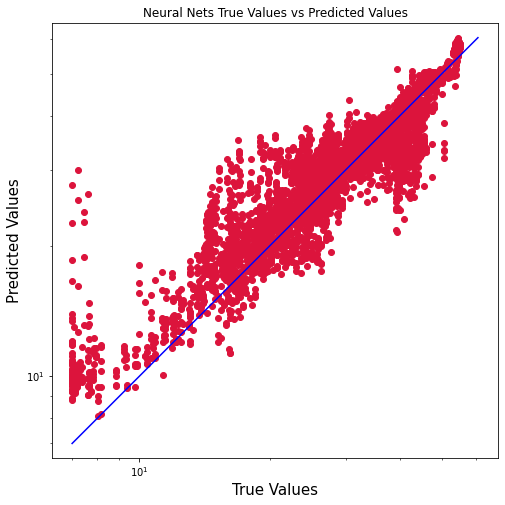

In [9]:
#scatter plot
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Neural Nets True Values vs Predicted Values")
plt.axis('equal')
plt.show()